In [80]:
import pandas as pd

In [192]:
neighbourhoods = pd.read_csv("D:/DataSets/DatabaseTables/NeighbourhoodsV4.csv")

In [167]:
def calculate_z_scores(df, df_name):
    count_name = f'{df_name}Count'
    z_score_name = f"{df_name}_z_score"
    z_score_mapped_name = f"{df_name}_score"
    
    counts = df.groupby('neighbourhoodGeoLocation').size().reset_index(name=count_name)
    z_scores_df = neighbourhood_z_scores.copy()
    
    z_scores_df = pd.merge(z_scores_df, counts, on='neighbourhoodGeoLocation', how='left')

    z_scores_df[count_name] = z_scores_df[count_name].fillna(0)

    mean_count = z_scores_df[count_name].mean()
    std_dev_count = z_scores_df[count_name].std()

    # Calculate z-score for the count column
    z_scores_df[z_score_name] = (z_scores_df[count_name] - mean_count) / std_dev_count
    
    # define min and max mapping scores
    mapped_min = 1
    mapped_max = 5

    z_scores_df[z_score_mapped_name] = ((z_scores_df[z_score_name] - z_scores_df[z_score_name].min()) / (z_scores_df[z_score_name].max() - z_scores_df[z_score_name].min())) * (mapped_max - mapped_min) + mapped_min
    
    z_scores_df = z_scores_df.drop(z_score_name,axis = 1)
    return z_scores_df

# Using a different mapping technique

In [378]:
# Sigmoid mapping function
def sigmoid_mapping(x, mean, scale):
    return 1 + 4 / (1 + np.exp(-1.75 * (x - mean) / scale))

def calculate_z_scores(df, df_name):
    count_name = f'{df_name}Count'
    z_score_name = f"{df_name}_score"
    z_score_mapped_name = f"{df_name}_z_score"
    
    counts = df.groupby('neighbourhoodGeoLocation').size().reset_index(name=count_name)
    z_scores_df = neighbourhood_z_scores.copy()
    
    z_scores_df = pd.merge(z_scores_df, counts, on='neighbourhoodGeoLocation', how='left')

    z_scores_df[count_name] = z_scores_df[count_name].fillna(0)

    mean_count = z_scores_df[count_name].mean()
    std_dev_count = z_scores_df[count_name].std()

    # Calculate z-score for the count column
    z_scores_df[z_score_name] = (z_scores_df[count_name] - mean_count) / std_dev_count
    
    # sigmoid mapping
    mean_value = z_scores_df[z_score_name].mean()
    scale_value = z_scores_df[z_score_name].std()

    z_scores_df[z_score_mapped_name] = sigmoid_mapping(z_scores_df[z_score_name], mean_value, scale_value)
    ###
    
    # drop unwanted columns
    z_scores_df = z_scores_df.drop(z_score_name,axis = 1)
    return z_scores_df

In [379]:
neighbourhood_z_scores = neighbourhoods.copy()

# Define a function to create scores by category

In [380]:
def calculate_cateogry_score(df,components, name):
    z_scores_df = df.copy()
    
    z_scores_df[name] = z_scores_df[components].sum(axis=1)
    
    mean_value = z_scores_df[name].mean()
    scale_value = z_scores_df[name].std()
    
    z_scores_df[name] = z_scores_df[components].mean(axis=1)
    
    return z_scores_df

# Banks

In [348]:
bank = pd.read_csv("D:/DataSets/DatabaseTables/banks.csv")

In [381]:
neighbourhood_z_scores = calculate_z_scores(bank, "bank")

# Bars

In [382]:
bar = pd.read_csv("D:/DataSets/DatabaseTables/bars.csv")
neighbourhood_z_scores = calculate_z_scores(bar, "bar")
neighbourhood_z_scores

,neighbourhoodID,neighbourhoodGeoLocation,bankCount,bank_z_score,barCount,bar_z_score
0,0,POINT(39.370859 -76.6701475),1.0,2.064463,4.0,1.741426
1,1,POINT(39.2842097 -76.593611),16.0,3.762947,60.0,4.514675
2,2,POINT(39.3216614 -76.5737173),0.0,1.972503,9.0,1.946329
3,3,POINT(39.292007 -76.6167212),69.0,4.997096,120.0,4.986492
4,4,POINT(39.3416271 -76.68169619999999),5.0,2.482419,7.0,1.859968
5,5,POINT(39.2817753 -76.69324379999999),0.0,1.972503,6.0,1.818988
6,6,POINT(39.320533 -76.7065867),1.0,2.064463,0.0,1.603560
7,7,POINT(39.3406246 -76.59649999999999),6.0,2.597160,6.0,1.818988
8,8,POINT(39.2680512 -76.59105919999999),5.0,2.482419,19.0,2.460129
9,9,POINT(39.2530783 -76.64659019999999),1.0,2.064463,4.0,1.741426


# Beauty Salons

In [383]:
beauty_salon = pd.read_csv("D:/DataSets/DatabaseTables/bars.csv")
neighbourhood_z_scores = calculate_z_scores(beauty_salon, "beauty_salon")

# Bus Stations

In [384]:
bus_station = pd.read_csv("D:/DataSets/DatabaseTables/bus_stations.csv")
neighbourhood_z_scores = calculate_z_scores(bus_station, "bus_station")

# Cafes

In [385]:
cafe = pd.read_csv("D:/DataSets/DatabaseTables/cafes.csv")
neighbourhood_z_scores = calculate_z_scores(cafe, "cafe")

# Fire stations

In [386]:
fire_station = pd.read_csv("D:/DataSets/DatabaseTables/fire_stations.csv")
neighbourhood_z_scores = calculate_z_scores(fire_station, "fire_station")

# Gyms

In [387]:
gym = pd.read_csv("D:/DataSets/DatabaseTables/gyms.csv")
neighbourhood_z_scores = calculate_z_scores(gym, "gym")

# Hospitals

In [388]:
hospital = pd.read_csv("D:/DataSets/DatabaseTables/hospitals.csv")
neighbourhood_z_scores = calculate_z_scores(hospital, "hospital")

# Night clubs

In [389]:
night_clubs = pd.read_csv("D:/DataSets/DatabaseTables/night_clubs.csv")
neighbourhood_z_scores = calculate_z_scores(night_clubs, "night_club")

# Parks

In [390]:
park = pd.read_csv("D:/DataSets/DatabaseTables/parks.csv")
neighbourhood_z_scores = calculate_z_scores(park, "park")

# Pharmacies

In [391]:
pharmacy = pd.read_csv("D:/DataSets/DatabaseTables/pharmacies.csv")
neighbourhood_z_scores = calculate_z_scores(pharmacy, "pharmacy")

# Police Stations

In [392]:
police_stations = pd.read_csv("D:/DataSets/DatabaseTables/police_stations.csv")
neighbourhood_z_scores = calculate_z_scores(police_stations, "police_station")

# Restaurants

In [393]:
restaurant = pd.read_csv("D:/DataSets/DatabaseTables/restaurants.csv")
neighbourhood_z_scores = calculate_z_scores(restaurant, "restaurant")

# Supermarkets

In [394]:
supermarket = pd.read_csv("D:/DataSets/DatabaseTables/supermarkets.csv")
neighbourhood_z_scores = calculate_z_scores(supermarket, "supermarket")

# Train Stations 

In [395]:
train_stations = pd.read_csv("D:/DataSets/DatabaseTables/train_stations.csv")
neighbourhood_z_scores = calculate_z_scores(train_stations, "train_station")

# Transit Scores

In [396]:
transit_stations = pd.read_csv("D:/DataSets/DatabaseTables/transit_stations.csv")
neighbourhood_z_scores = calculate_z_scores(transit_stations, "transit_station")

# Create backup

In [397]:
stats = neighbourhood_z_scores.copy()

In [398]:
stats

,neighbourhoodID,neighbourhoodGeoLocation,bankCount,bank_z_score,barCount,bar_z_score,beauty_salonCount,beauty_salon_z_score,bus_stationCount,bus_station_z_score,cafeCount,cafe_z_score,fire_stationCount,fire_station_z_score,gymCount,gym_z_score,hospitalCount,hospital_z_score,night_clubCount,night_club_z_score,parkCount,park_z_score,pharmacyCount,pharmacy_z_score,police_stationCount,police_station_z_score,restaurantCount,restaurant_z_score,supermarketCount,supermarket_z_score,train_stationCount,train_station_z_score,transit_stationCount,transit_station_z_score
0,0,POINT(39.370859 -76.6701475),1.0,2.064463,4.0,1.741426,4.0,1.741426,0.0,2.024056,5.0,2.038017,0.0,1.623882,4.0,2.129184,60.0,4.901679,0.0,1.903917,12,1.782204,7.0,2.139942,0.0,2.148889,22,1.578582,1.0,1.717650,0.0,2.062595,56,2.401412
1,1,POINT(39.2842097 -76.593611),16.0,3.762947,60.0,4.514675,60.0,4.514675,1.0,2.545000,37.0,4.117627,3.0,3.178608,22.0,4.440337,33.0,4.239968,13.0,4.123450,53,3.974973,16.0,2.801969,6.0,4.644583,60,3.586677,4.0,2.952919,0.0,2.062595,60,2.695765
2,2,POINT(39.3216614 -76.5737173),0.0,1.972503,9.0,1.946329,9.0,1.946329,0.0,2.024056,4.0,1.983483,0.0,1.623882,4.0,2.129184,2.0,1.990349,0.0,1.903917,15,1.902709,8.0,2.206364,0.0,2.148889,39,2.316849,2.0,2.052917,0.0,2.062595,60,2.695765
3,3,POINT(39.292007 -76.6167212),69.0,4.997096,120.0,4.986492,120.0,4.986492,3.0,3.711717,119.0,4.996966,14.0,4.996453,42.0,4.969556,102.0,4.996867,43.0,4.996513,120,4.976190,120.0,4.998828,17.0,4.998967,120,4.949777,11.0,4.869622,2.0,4.987068,120,4.949356
4,4,POINT(39.3416271 -76.68169619999999),5.0,2.482419,7.0,1.859968,7.0,1.859968,4.0,4.175183,6.0,2.094478,2.0,2.563677,3.0,2.009619,1.0,1.930070,3.0,2.368531,11,1.744844,10.0,2.345518,1.0,2.634670,49,2.915053,4.0,2.952919,0.0,2.062595,60,2.695765
5,5,POINT(39.2817753 -76.69324379999999),0.0,1.972503,6.0,1.818988,6.0,1.818988,0.0,2.024056,4.0,1.983483,1.0,2.024670,3.0,2.009619,13.0,2.798081,3.0,2.368531,13,1.820965,7.0,2.139942,2.0,3.169552,26,1.714008,1.0,1.717650,0.0,2.062595,60,2.695765
6,6,POINT(39.320533 -76.7065867),1.0,2.064463,0.0,1.603560,0.0,1.603560,1.0,2.545000,1.0,1.831757,0.0,1.623882,0.0,1.703812,1.0,1.930070,0.0,1.903917,7,1.609157,1.0,1.790850,0.0,2.148889,7,1.247827,1.0,1.717650,0.0,2.062595,60,2.695765
7,7,POINT(39.3406246 -76.59649999999999),6.0,2.597160,6.0,1.818988,6.0,1.818988,0.0,2.024056,4.0,1.983483,2.0,2.563677,7.0,2.533810,6.0,2.256411,2.0,2.200877,21,2.181035,3.0,1.897472,2.0,3.169552,45,2.667418,4.0,2.952919,0.0,2.062595,120,4.949356
8,8,POINT(39.2680512 -76.59105919999999),5.0,2.482419,19.0,2.460129,19.0,2.460129,5.0,4.502504,9.0,2.274844,5.0,4.223956,14.0,3.577287,2.0,1.990349,0.0,1.903917,11,1.744844,4.0,1.954481,0.0,2.148889,59,3.528882,0.0,1.472039,0.0,2.062595,29,1.248170
9,9,POINT(39.2530783 -76.64659019999999),1.0,2.064463,4.0,1.741426,4.0,1.741426,0.0,2.024056,2.0,1.880333,0.0,1.623882,3.0,2.009619,3.0,2.053195,1.0,2.045600,10,1.708876,6.0,2.075769,0.0,2.148889,42,2.487927,3.0,2.474453,0.0,2.062595,60,2.695765


# Now create score by category

# Finance Service

In [400]:
service = ["bank_z_score"]

stats = calculate_cateogry_score(stats,service,"finance_score")

In [401]:
stats

,neighbourhoodID,neighbourhoodGeoLocation,bankCount,bank_z_score,barCount,bar_z_score,beauty_salonCount,beauty_salon_z_score,bus_stationCount,bus_station_z_score,cafeCount,cafe_z_score,fire_stationCount,fire_station_z_score,gymCount,gym_z_score,hospitalCount,hospital_z_score,night_clubCount,night_club_z_score,parkCount,park_z_score,pharmacyCount,pharmacy_z_score,police_stationCount,police_station_z_score,restaurantCount,restaurant_z_score,supermarketCount,supermarket_z_score,train_stationCount,train_station_z_score,transit_stationCount,transit_station_z_score,finance_score
0,0,POINT(39.370859 -76.6701475),1.0,2.064463,4.0,1.741426,4.0,1.741426,0.0,2.024056,5.0,2.038017,0.0,1.623882,4.0,2.129184,60.0,4.901679,0.0,1.903917,12,1.782204,7.0,2.139942,0.0,2.148889,22,1.578582,1.0,1.717650,0.0,2.062595,56,2.401412,2.064463
1,1,POINT(39.2842097 -76.593611),16.0,3.762947,60.0,4.514675,60.0,4.514675,1.0,2.545000,37.0,4.117627,3.0,3.178608,22.0,4.440337,33.0,4.239968,13.0,4.123450,53,3.974973,16.0,2.801969,6.0,4.644583,60,3.586677,4.0,2.952919,0.0,2.062595,60,2.695765,3.762947
2,2,POINT(39.3216614 -76.5737173),0.0,1.972503,9.0,1.946329,9.0,1.946329,0.0,2.024056,4.0,1.983483,0.0,1.623882,4.0,2.129184,2.0,1.990349,0.0,1.903917,15,1.902709,8.0,2.206364,0.0,2.148889,39,2.316849,2.0,2.052917,0.0,2.062595,60,2.695765,1.972503
3,3,POINT(39.292007 -76.6167212),69.0,4.997096,120.0,4.986492,120.0,4.986492,3.0,3.711717,119.0,4.996966,14.0,4.996453,42.0,4.969556,102.0,4.996867,43.0,4.996513,120,4.976190,120.0,4.998828,17.0,4.998967,120,4.949777,11.0,4.869622,2.0,4.987068,120,4.949356,4.997096
4,4,POINT(39.3416271 -76.68169619999999),5.0,2.482419,7.0,1.859968,7.0,1.859968,4.0,4.175183,6.0,2.094478,2.0,2.563677,3.0,2.009619,1.0,1.930070,3.0,2.368531,11,1.744844,10.0,2.345518,1.0,2.634670,49,2.915053,4.0,2.952919,0.0,2.062595,60,2.695765,2.482419
5,5,POINT(39.2817753 -76.69324379999999),0.0,1.972503,6.0,1.818988,6.0,1.818988,0.0,2.024056,4.0,1.983483,1.0,2.024670,3.0,2.009619,13.0,2.798081,3.0,2.368531,13,1.820965,7.0,2.139942,2.0,3.169552,26,1.714008,1.0,1.717650,0.0,2.062595,60,2.695765,1.972503
6,6,POINT(39.320533 -76.7065867),1.0,2.064463,0.0,1.603560,0.0,1.603560,1.0,2.545000,1.0,1.831757,0.0,1.623882,0.0,1.703812,1.0,1.930070,0.0,1.903917,7,1.609157,1.0,1.790850,0.0,2.148889,7,1.247827,1.0,1.717650,0.0,2.062595,60,2.695765,2.064463
7,7,POINT(39.3406246 -76.59649999999999),6.0,2.597160,6.0,1.818988,6.0,1.818988,0.0,2.024056,4.0,1.983483,2.0,2.563677,7.0,2.533810,6.0,2.256411,2.0,2.200877,21,2.181035,3.0,1.897472,2.0,3.169552,45,2.667418,4.0,2.952919,0.0,2.062595,120,4.949356,2.597160
8,8,POINT(39.2680512 -76.59105919999999),5.0,2.482419,19.0,2.460129,19.0,2.460129,5.0,4.502504,9.0,2.274844,5.0,4.223956,14.0,3.577287,2.0,1.990349,0.0,1.903917,11,1.744844,4.0,1.954481,0.0,2.148889,59,3.528882,0.0,1.472039,0.0,2.062595,29,1.248170,2.482419
9,9,POINT(39.2530783 -76.64659019999999),1.0,2.064463,4.0,1.741426,4.0,1.741426,0.0,2.024056,2.0,1.880333,0.0,1.623882,3.0,2.009619,3.0,2.053195,1.0,2.045600,10,1.708876,6.0,2.075769,0.0,2.148889,42,2.487927,3.0,2.474453,0.0,2.062595,60,2.695765,2.064463


# Transportation Services

In [403]:
service = ["transit_station_z_score","train_station_z_score","bus_station_z_score"]

stats = calculate_cateogry_score(stats,service,"transportation_score")

# Personal Care Services

In [404]:
service = ["beauty_salon_z_score","pharmacy_z_score"]

stats = calculate_cateogry_score(stats,service,"personal_care_score")

# Retail Services

In [405]:
service = ["supermarket_z_score"]

stats = calculate_cateogry_score(stats,service,"retail_score")

# Fitness Services

In [406]:
service = ["gym_z_score"]

stats = calculate_cateogry_score(stats,service,"fitness_score")

# Leisure Services

In [407]:
service = ["park_z_score","cafe_z_score","restaurant_z_score","night_club_z_score","bar_z_score"]

stats = calculate_cateogry_score(stats,service,"leisure_score")

# Emergency Services

In [408]:
service = ["police_station_z_score","fire_station_z_score","hospital_z_score"]

stats = calculate_cateogry_score(stats,service,"personal_care_score")

In [279]:
service = ["police_station_score","fire_station_score","hospital_score","park_score","cafe_score","restaurant_score","night_club_score","bar_score","gym_score","supermarket_score","beauty_salon_score","pharmacy_score","transit_station_score","train_station_score","bus_station_score","bank_score"]
stats = stats.drop(columns = service, axis = 1)

In [418]:
stats

,neighbourhoodID,neighbourhoodGeoLocation,bankCount,bank_z_score,barCount,bar_z_score,beauty_salonCount,beauty_salon_z_score,bus_stationCount,bus_station_z_score,cafeCount,cafe_z_score,fire_stationCount,fire_station_z_score,gymCount,gym_z_score,hospitalCount,hospital_z_score,night_clubCount,night_club_z_score,parkCount,park_z_score,pharmacyCount,pharmacy_z_score,police_stationCount,police_station_z_score,restaurantCount,restaurant_z_score,supermarketCount,supermarket_z_score,train_stationCount,train_station_z_score,transit_stationCount,transit_station_z_score,finance_score,transportation_score,personal_care_score,retail_score,fitness_score,leisure_score,sum_count,sum_z_scores,overall_score
0,0,POINT(39.370859 -76.6701475),1.0,2.064463,4.0,1.741426,4.0,1.741426,0.0,2.024056,5.0,2.038017,0.0,1.623882,4.0,2.129184,60.0,4.901679,0.0,1.903917,12,1.782204,7.0,2.139942,0.0,2.148889,22,1.578582,1.0,1.717650,0.0,2.062595,56,2.401412,2.064463,2.162688,2.891483,1.717650,2.129184,1.808829,176.0,33.999325,1.744182
1,1,POINT(39.2842097 -76.593611),16.0,3.762947,60.0,4.514675,60.0,4.514675,1.0,2.545000,37.0,4.117627,3.0,3.178608,22.0,4.440337,33.0,4.239968,13.0,4.123450,53,3.974973,16.0,2.801969,6.0,4.644583,60,3.586677,4.0,2.952919,0.0,2.062595,60,2.695765,3.762947,2.434453,4.021053,2.952919,4.440337,4.063481,444.0,58.156771,4.403805
2,2,POINT(39.3216614 -76.5737173),0.0,1.972503,9.0,1.946329,9.0,1.946329,0.0,2.024056,4.0,1.983483,0.0,1.623882,4.0,2.129184,2.0,1.990349,0.0,1.903917,15,1.902709,8.0,2.206364,0.0,2.148889,39,2.316849,2.0,2.052917,0.0,2.062595,60,2.695765,1.972503,2.260806,1.921040,2.052917,2.129184,2.010657,152.0,32.906119,1.659971
3,3,POINT(39.292007 -76.6167212),69.0,4.997096,120.0,4.986492,120.0,4.986492,3.0,3.711717,119.0,4.996966,14.0,4.996453,42.0,4.969556,102.0,4.996867,43.0,4.996513,120,4.976190,120.0,4.998828,17.0,4.998967,120,4.949777,11.0,4.869622,2.0,4.987068,120,4.949356,4.997096,4.549380,4.997429,4.869622,4.969556,4.981188,1142.0,78.367962,4.953107
4,4,POINT(39.3416271 -76.68169619999999),5.0,2.482419,7.0,1.859968,7.0,1.859968,4.0,4.175183,6.0,2.094478,2.0,2.563677,3.0,2.009619,1.0,1.930070,3.0,2.368531,11,1.744844,10.0,2.345518,1.0,2.634670,49,2.915053,4.0,2.952919,0.0,2.062595,60,2.695765,2.482419,2.977848,2.376139,2.952919,2.009619,2.196575,173.0,38.695276,2.197421
5,5,POINT(39.2817753 -76.69324379999999),0.0,1.972503,6.0,1.818988,6.0,1.818988,0.0,2.024056,4.0,1.983483,1.0,2.024670,3.0,2.009619,13.0,2.798081,3.0,2.368531,13,1.820965,7.0,2.139942,2.0,3.169552,26,1.714008,1.0,1.717650,0.0,2.062595,60,2.695765,1.972503,2.260806,2.664101,1.717650,2.009619,1.941195,145.0,34.139395,1.755550
6,6,POINT(39.320533 -76.7065867),1.0,2.064463,0.0,1.603560,0.0,1.603560,1.0,2.545000,1.0,1.831757,0.0,1.623882,0.0,1.703812,1.0,1.930070,0.0,1.903917,7,1.609157,1.0,1.790850,0.0,2.148889,7,1.247827,1.0,1.717650,0.0,2.062595,60,2.695765,2.064463,2.434453,1.900947,1.717650,1.703812,1.639244,80.0,30.082756,1.477805
7,7,POINT(39.3406246 -76.59649999999999),6.0,2.597160,6.0,1.818988,6.0,1.818988,0.0,2.024056,4.0,1.983483,2.0,2.563677,7.0,2.533810,6.0,2.256411,2.0,2.200877,21,2.181035,3.0,1.897472,2.0,3.169552,45,2.667418,4.0,2.952919,0.0,2.062595,120,4.949356,2.597160,3.012002,2.663213,2.952919,2.533810,2.170360,234.0,39.677797,2.310022
8,8,POINT(39.2680512 -76.59105919999999),5.0,2.482419,19.0,2.460129,19.0,2.460129,5.0,4.502504,9.0,2.274844,5.0,4.223956,14.0,3.577287,2.0,1.990349,0.0,1.903917,11,1.744844,4.0,1.954481,0.0,2.148889,59,3.528882,0.0,1.472039,0.0,2.062595,29,1.248170,2.482419,2.604423,2.787731,1.472039,3.577287,2.382523,181.0,40.035434,2.352333
9,9,POINT(39.2530783 -76.64659019999999),1.0,2.064463,4.0,1.741426,4.0,1.741426,0.0,2.024056,2.0,1.880333,0.0,1.623882,3.0,2.009619,3.0,2.053195,1.0,2.045600,10,1.708876,6.0,2.075769,0.0,2.148889,42,2.487927,3.0,2.474453,0.0,2.062595,60,2.695765,2.064463,2.260806,1.941989,2.474453,2.009619,1.972832,139.0,32.838273,1.655006


# Data aggregation

In [410]:
count_columns = stats.filter(like='Count')

# Create a new column 'sum_z_scores' which contains the sum of the "_z_score_mapped" values for each row
stats['sum_count'] = count_columns.apply(lambda row: row.sum(), axis=1)


In [414]:
z_score_columns = stats.filter(like='_z_score')

# Create a new column 'sum_z_scores' which contains the sum of the "_z_score_mapped" values for each row
stats['sum_z_scores'] = z_score_columns.apply(lambda row: row.sum(), axis=1)


# Data Normalisation

In [385]:
min_score = stats['sum_z_scores'].min()
max_score = stats['sum_z_scores'].max()

# Perform Min-Max normalization and scale between 1 and 100
stats['sum_z_scores_normalized'] = ((stats['sum_z_scores'] - min_score) / (max_score - min_score)) * 99 + 1

In [316]:
stats["ranked_column"] = stats["sum_z_scores_normalized"].rank()

In [321]:
stats= stats.drop("neighbourhoodGeoLocation", axis = 1)

In [259]:
stats["neighbourhood_z_score_ID"] = stats["neighbourhoodID"]

In [353]:
stats.insert(1,"neighbourhood_z_score_ID", stats.pop("neighbourhood_z_score_ID"))

In [408]:
# Apply winsorization to the sum_z_scores
winsorized_data = mstats.winsorize(stats['sum_z_scores'], limits=[0.02, 0.02])

# Store the winsorized values in a new column
stats['winsorized_sum_z_scores'] = winsorized_data

# Calculate z scores for winsorized_sum_z_scores
mean_winsorized_sum_z_scores = stats['winsorized_sum_z_scores'].mean()
std_winsorized_sum_z_scores = stats['winsorized_sum_z_scores'].std()

stats['z_scores'] = (stats['winsorized_sum_z_scores'] - mean_winsorized_sum_z_scores) / std_winsorized_sum_z_scores

# Linear map transformation between 1 and 5
new_min = 1
new_max = 5
stats['linear_mapped_final_z_scores'] = ((stats['z_scores'] - stats['z_scores'].min()) / 
                                      (stats['z_scores'].max() - stats['z_scores'].min())) * (new_max - new_min) + new_min


In [417]:
# Sigmoid mapping function
def sigmoid_mapping(x, mean, scale):
    return 1 + 4 / (1 + np.exp(-1.75 * (x - mean) / scale))

# Calculate mean and standard deviation
mean_value = stats['sum_z_scores'].mean()
scale_value = stats['sum_z_scores'].std()

# Apply the sigmoid mapping
stats['overall_score'] = sigmoid_mapping(stats['sum_z_scores'], mean_value, scale_value)

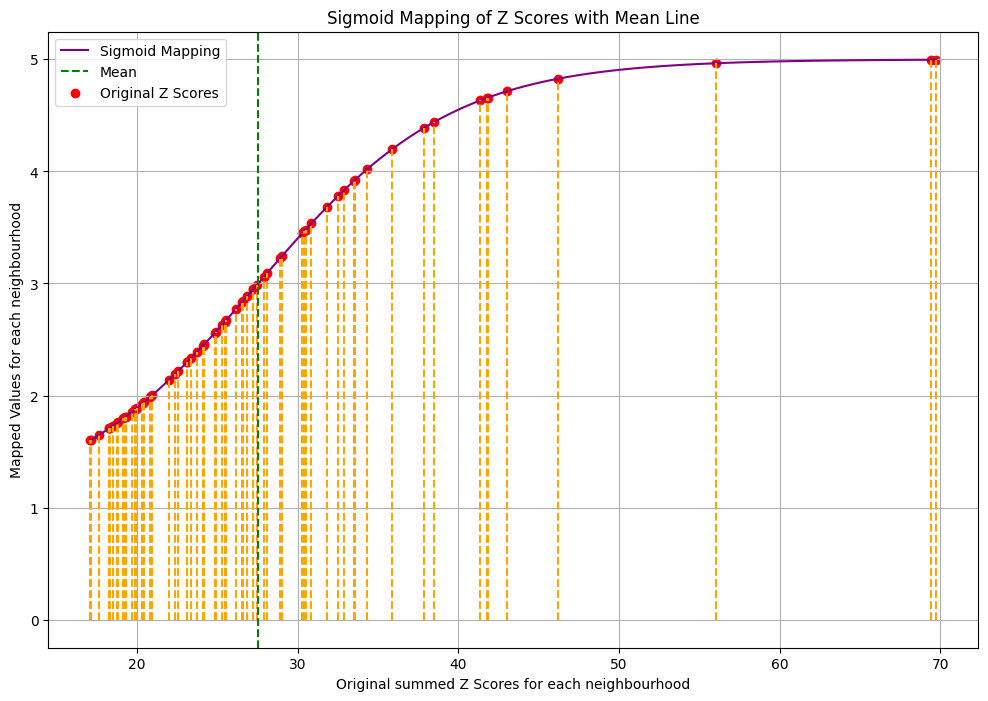

In [495]:
import matplotlib.pyplot as plt
import numpy as np

# Sigmoid mapping function
def sigmoid_mapping(x, mean, scale):
    return 1 + 4 / (1 + np.exp(-1.75 * (x - mean) / scale))

# Calculate mean and standard deviation
mean_value = stats['sum_z_scores'].mean()
scale_value = stats['sum_z_scores'].std()

# Apply the sigmoid mapping0.05
stats['mapped_values_sigmoid'] = sigmoid_mapping(stats['sum_z_scores'], mean_value, scale_value)

# Set a larger figure size
plt.figure(figsize=(12, 8))

# Plotting the sigmoid function
x_values = np.linspace(stats['sum_z_scores'].min(), stats['sum_z_scores'].max(), 100)
y_values = sigmoid_mapping(x_values, mean_value, scale_value)

plt.plot(x_values, y_values, color='purple', label='Sigmoid Mapping')

# Plotting vertical lines
for index, row in stats.iterrows():
    plt.plot([row['sum_z_scores'], row['sum_z_scores']], [0, row['mapped_values_sigmoid']], linestyle='dashed', color='orange')

# Plotting mean line
plt.axvline(x=mean_value, color='green', linestyle='dashed', label='Mean')

plt.scatter(stats['sum_z_scores'], stats['mapped_values_sigmoid'], color='red', label='Original Z Scores')
plt.xlabel('Original summed Z Scores for each neighbourhood')
plt.ylabel('Mapped Values for each neighbourhood')
plt.legend()
plt.title('Sigmoid Mapping of Z Scores with Mean Line')
plt.grid(True)
plt.show()


In [407]:
# Calculate the threshold for the bottom 10 percent
threshold = stats['sum_z_scores'].quantile(0.1)

# Filter values below the threshold
bottom_10_percent_values = stats[stats['sum_z_scores'] < threshold]

bottom_10_percent_values

C:\Users\seanl\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


,neighbourhoodID,neighbourhood_z_score_ID,bankCount,bank_z_score_mapped,barCount,bar_z_score_mapped,beauty_salonCount,beauty_salon_z_score_mapped,bus_stationCount,bus_station_z_score_mapped,...,supermarket_z_score_mapped,train_stationCount,train_station_z_score_mapped,transit_stationCount,transit_station_z_score_mapped,sum_count,sum_z_scores,winsorized_sum_z_scores,z_scores,linear_mapped_final_z_scores
6,6,6,1.0,1.05,0.0,1.000000,0.0,1.000000,1.0,1.222222,...,1.222222,0.0,1.0,60,1.842105,80.0,17.623490,18.507468,-1.09672,1.0
14,14,14,0.0,1.00,2.0,1.066667,2.0,1.066667,0.0,1.000000,...,1.222222,0.0,1.0,39,1.289474,66.0,17.108821,18.507468,-1.09672,1.0
23,23,23,1.0,1.05,0.0,1.000000,0.0,1.000000,0.0,1.000000,...,1.444444,0.0,1.0,60,1.842105,96.0,18.349473,18.507468,-1.09672,1.0
32,32,32,1.0,1.05,3.0,1.100000,3.0,1.100000,0.0,1.000000,...,1.222222,0.0,1.0,60,1.842105,106.0,18.496736,18.507468,-1.09672,1.0
38,38,38,3.0,1.15,4.0,1.133333,4.0,1.133333,1.0,1.222222,...,1.444444,0.0,1.0,42,1.368421,89.0,18.291187,18.507468,-1.09672,1.0
63,63,63,0.0,1.00,1.0,1.033333,1.0,1.033333,0.0,1.000000,...,1.222222,0.0,1.0,60,1.842105,98.0,18.269194,18.507468,-1.09672,1.0
64,64,64,7.0,1.35,4.0,1.133333,4.0,1.133333,0.0,1.000000,...,1.222222,0.0,1.0,49,1.552632,94.0,18.507468,18.507468,-1.09672,1.0
71,71,71,0.0,1.00,10.0,1.333333,10.0,1.333333,0.0,1.000000,...,1.000000,0.0,1.0,28,1.000000,60.0,17.161875,18.507468,-1.09672,1.0


In [453]:
average_value = stats["sum_z_scores"].mean()
average_value

27.548566951939492

In [454]:
sum_z_scores = stats["sum_z_scores"]
# Calculate mean
mean_sum_z_scores = np.mean(sum_z_scores)

# Calculate squared differences
squared_diff = [(x - mean_sum_z_scores)**2 for x in sum_z_scores]

# Sum of squared differences
sum_squared_diff = np.sum(squared_diff)

# Number of data points
N = len(sum_z_scores)

# Calculate scale
scale = np.sqrt(sum_squared_diff / N)

print("Mean:", mean_sum_z_scores)
print("Scale:", scale)

Mean: 27.548566951939492
Scale: 10.477414861402659


In [419]:
stats.to_csv("D:/DataSets/DatabaseTables//neighbourhoodZScores.csv", index = False)